## Matplotlib Fundamentals

In [3]:
import matplotlib as plt
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


### EDA - Exploratory Data Analysis

In [ ]:
df.shape

# long table

(4377, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [7]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [ ]:
# brand and total quantity for each brand

import duckdb

df_quantity_brand = duckdb.query("""
    SELECT 
        make AS Brand,
        SUM(quantity) as Quantity
    FROM 
        df
    GROUP BY
        make
    ORDER BY
        quantity DESC
""").df()

df_quantity_brand.head(20)

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
5,Audi,70475.0
6,Skoda,66007.0
7,Nissan,64535.0
8,Peugeot,61033.0
9,Mercedes-Benz,57557.0


## Bar Chart

<Axes: xlabel='Brand'>

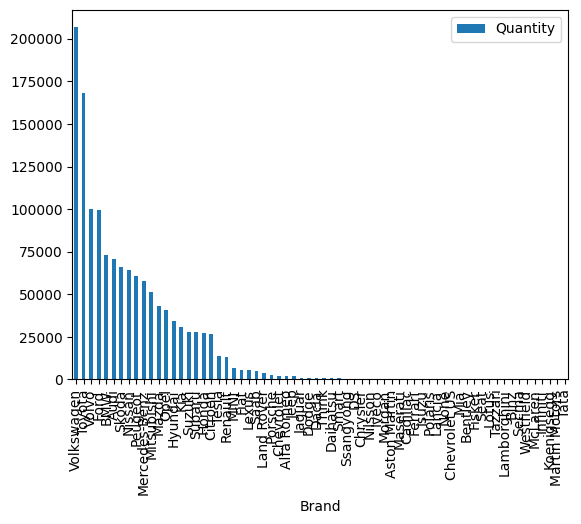

In [ ]:
df_quantity_brand.plot(kind = "bar", x = "Brand", y = "Quantity")

<Axes: xlabel='Brand'>

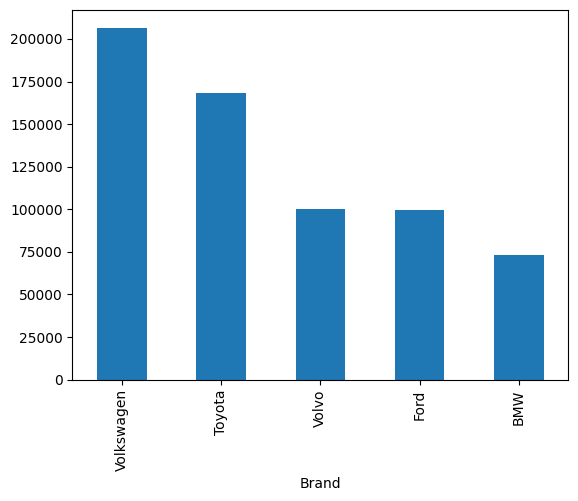

In [16]:
top5 = df_quantity_brand.nlargest(5, "Quantity")
top5.plot(kind="bar", x="Brand", y="Quantity", legend=False)

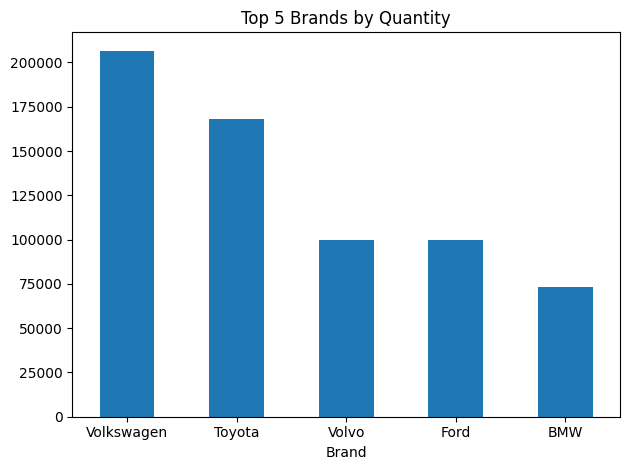

In [ ]:
import matplotlib.pyplot as plt

top5 = df_quantity_brand.nlargest(5, "Quantity")

ax = top5.plot(kind="bar", x="Brand", y="Quantity", legend=False)
plt.xticks(rotation=0)
plt.title("Top 5 Brands by Quantity")
plt.tight_layout()
plt.show()

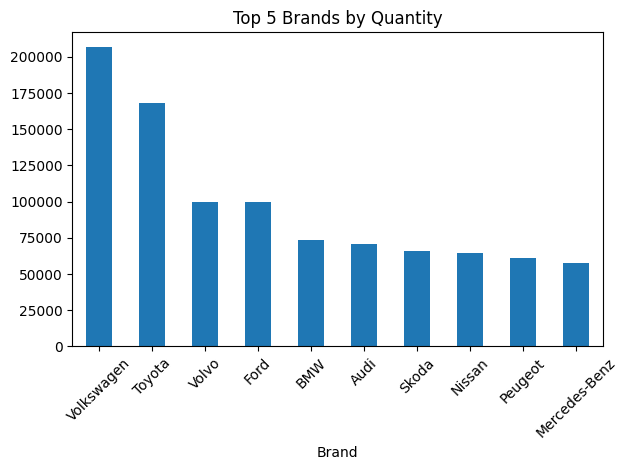

In [ ]:
top10 = df_quantity_brand.nlargest(10, "Quantity")

ax = top10.plot(kind="bar", x="Brand", y="Quantity", legend=False)
plt.xticks(rotation=45)
plt.title("Top 5 Brands by Quantity")
plt.tight_layout()
plt.show()

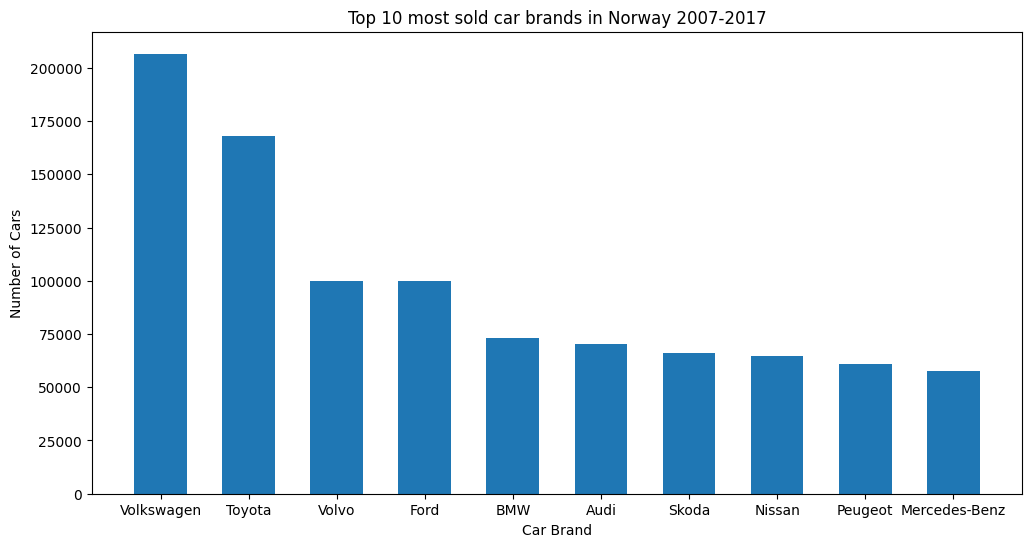

In [70]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"],
    width=0.6
)

ax.set(title = "Top 10 most sold car brands in Norway 2007-2017",
    xlabel = "Car Brand",
    ylabel = "Number of Cars")

fig.savefig("figures/top10_car_brand_sold_barchart.png")

### Line Chart

In [54]:
df_quantity_year = duckdb.query("""
    SELECT
        year,
        SUM(quantity) AS Quantity
    FROM
        df
    GROUP BY
        year
    ORDER BY
        year ASC
    
""").df().set_index("Year")

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

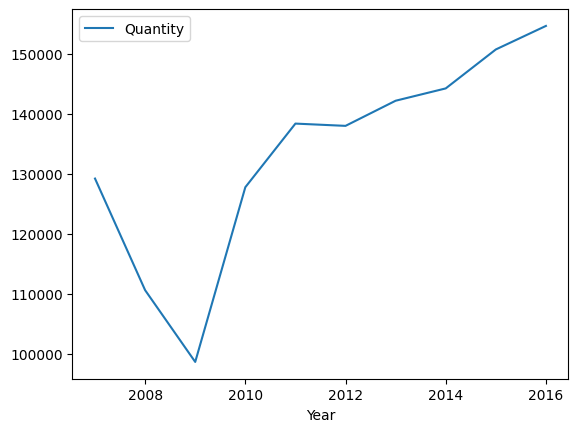

In [56]:
df_quantity_year.iloc[:-1].plot()

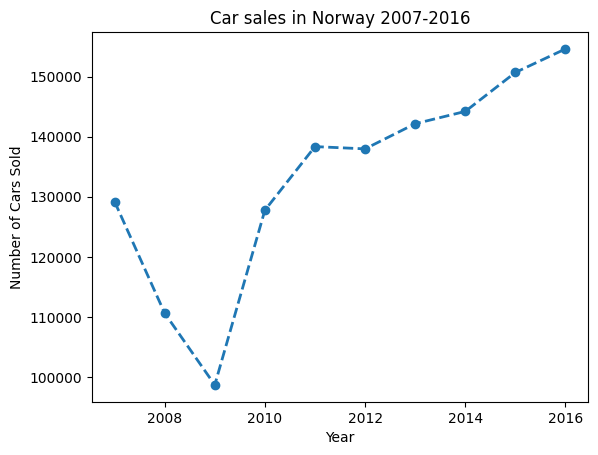

In [69]:
df_quantity_year.iloc[:-1].plot(
    title="Car sales in Norway 2007-2016",
    xlabel="Year",
    ylabel="Number of Cars Sold",
    style="--o",
    linewidth=2,
    legend=False
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_linechart")